In [1]:
import random
import numpy as np
from scipy import stats
from os import listdir
import matplotlib.pyplot as plt
import scipy.io as sio
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as mpatches
import scipy.stats as sp
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib
from sklearn import linear_model
from matplotlib.colors import LinearSegmentedColormap

plt.style.use('rossidata')


/Users/nicholasrossi/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [5]:
folder='data/rob_collected'

names = listdir(folder)

if '.DS_Store' in names:
    names.remove('.DS_Store')

names= [folder+'/'+ name for name in names]



In [6]:
### creation of dataframe
InitialAu=np.array([])
Deathtime=np.array([])
for name in names:
    mat_contents = sio.loadmat(name)
    InitialAu=np.append(InitialAu,mat_contents['data'][:,20])
    Deathtime=np.append(Deathtime,mat_contents['data'][:,-1])
    
d = {'InitialAu': InitialAu, 'DeathTime': Deathtime}
df = pd.DataFrame(data=d)

In [198]:
### creation of progress matrix
progress_matrix=np.zeros((61,len(df)))
progress_matrix[:]=np.nan
df['DeathTime'][df['DeathTime']==-1]=62
df['DeathTime'][df['DeathTime']==0]=np.nan
positions=np.arange(len(df))
for r in range(61):
    progress_matrix[r,np.asarray(df['DeathTime']>=r)]=df['InitialAu'][df['DeathTime']>=r]

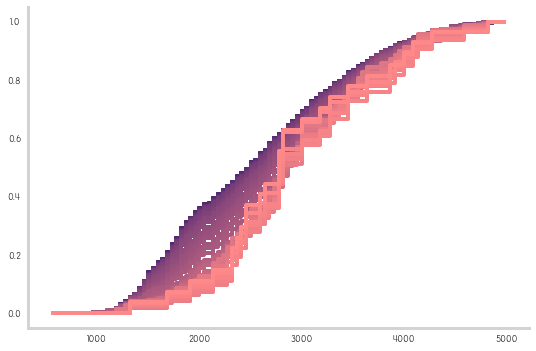

In [201]:
plt.close('all')
fig,ax=plt.subplots()
cmap1 = LinearSegmentedColormap.from_list("my_colormap",
                                          ((58 / 255, 28 / 255, 113 / 255), (1, 136 / 255, 136 / 255)), N=61,
                                          gamma=1.0)
bins=np.logspace(3.3,3.9,30)
bins=np.linspace(500,5000,100)
for r in range(61):
    data=progress_matrix[r,:]
    probs, bons = np.histogram(data[~np.isnan(data)], normed='True', bins=bins)
    ax.plot(bons[1:], np.cumsum(probs / np.sum(probs)), color=cmap1(r), drawstyle='steps-pre')
#ax.set_xscale('log')
fig



In [184]:
logistic_matrix=progress_matrix[:,~np.isnan(progress_matrix[0,:])]
initialAu[:]=logistic_matrix[0,:]
for r in range(61):
    logistic_matrix[r,:]=[~np.isnan(logistic_matrix[r,:])][0]*1
# clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
# clf.fit(progress_matrix[r,:], y)
logistic_matrix

clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(initialAu.reshape(-1, 1), logistic_matrix[20,:].reshape(-1, 1).ravel())

ValueError: could not broadcast input array from shape (266) into shape (373)

In [ ]:
plt.close('all')
fig,ax=plt.subplots()
X_test=np.logspace(3,4,1000)
X=initialAu

def model(x):
    return 1 / (1 + np.exp(-x))
for z in range(50):

    clf.fit(initialAu.reshape(-1, 1), logistic_matrix[z+11,:].reshape(-1, 1).ravel())
    loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot(X_test, loss, color=cmap1(z), linewidth=1)

fig

In [18]:
folders = ['dnaq_collected', 'fis_collected', 'tonb_collected', 'codb_collected', 'marrab_collected',
           'gadx_collected', 'crp_collected', 'ompf_collected', 'sigma_collected', 'soxs_collected',
           'purA_collected', 'hdea_collected', 'rob_collected','rnbp1_collected','acrab_collected','inaa_collected','rpst_collected']


In [21]:
#dataload

for folder0 in folders:
    plt.close('all')
    folder='data/'+folder0

    names = listdir(folder)

    if '.DS_Store' in names:
        names.remove('.DS_Store')

    names= [folder+'/'+ name for name in names]


    ### creation of dataframe
    InitialAu=np.array([])
    Deathtime=np.array([])
    for name in names:
        mat_contents = sio.loadmat(name)
        InitialAu=np.append(InitialAu,mat_contents['data'][:,20])
        Deathtime=np.append(Deathtime,mat_contents['data'][:,-1])

        d = {'InitialAu': InitialAu, 'DeathTime': Deathtime}
        df = pd.DataFrame(data=d)
        df['DeathTime'][df['DeathTime']==-1]=62
        df['DeathTime'][df['DeathTime']==0]=np.nan

        fig2,ax2=plt.subplots()
        df=df.dropna()
        s={'fluor':df['InitialAu'],'death':5*df['DeathTime']}
        sd=pd.DataFrame(s)
        sd=sd.sort_values(by='fluor')
        n_splits=10
        rez=np.array_split(sd, n_splits)
        column_num=10
        bins=np.linspace(0,300,column_num)-10
        grid=np.zeros((n_splits,column_num-1))
        labels=np.zeros((n_splits,column_num-1))
        mins=[]
    for x in range(n_splits):
        mino,maxo=min(rez[x].fluor),max(rez[x].fluor)
        grid[x,:]=np.cumsum(np.histogram(rez[x].death, bins=bins)[0]/len(rez[x].death))
        labels[x,:]=np.histogram(rez[x].death, bins=bins)[0]
        mins.append(int(mino))

    sns.heatmap(np.flipud(grid)*100,yticklabels=np.flipud(mins),xticklabels=bins[1:],cmap="rainbow",vmin=0, vmax=100,cbar_kws={'label': '% chance of death'})
    ax2.set_xlabel('Time (minutes)')
    ax2.set_ylabel('Fluorescence at t0 (A.U)')
    ax2.set_title(str(folder0.split('_')[0]))
    fig2.savefig('figures/'+folder0.split('_')[0]+'.png',dpi=300)

In [ ]:
df.dropna()

In [177]:
d = {'Dead': np.zeros(len(dataz[0])), 'AU': dataz[0]}
df = pd.DataFrame(data=d)

d = {'Dead': np.ones(len(dataz[1][dataz[1]<10000])), 'AU': dataz[1][dataz[1]<10000]}
df2 = pd.DataFrame(data=d)

NameError: name 'dataz' is not defined

In [178]:
frames = [df, df2]
result = pd.concat(frames)

NameError: name 'df2' is not defined

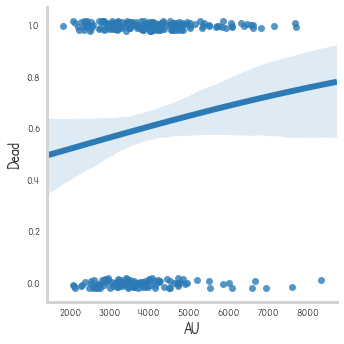

In [43]:
plt.close('all')
g = sns.lmplot(x="AU", y="Dead", data=result, y_jitter=.02, logistic=True)
plt.show()

In [42]:
np.append(deathframes,np.ones(len(dataz[1]))*55)


array([ 42.,  34.,  31.,  29.,  30.,  29.,  30.,  31.,  38.,  28.,  38.,
        45.,  35.,  47.,  32.,  50.,  18.,  31.,  50.,  50.,  31.,  47.,
        22.,  34.,  41.,  33.,  50.,  37.,  33.,  50.,  37.,  50.,  36.,
        31.,  36.,  30.,  39.,  27.,  42.,  50.,  50.,  50.,  19.,  47.,
        50.,  44.,  35.,  50.,   9.,  24.,  50.,  47.,  32.,  36.,  50.,
        19.,  35.,  39.,  27.,  48.,  43.,  41.,  43.,  17.,  40.,  10.,
        17.,  45.,  33.,  37.,  37.,  31.,  33.,  46.,  34.,  21.,  21.,
        45.,  27.,  50.,  21.,  50.,  22.,  48.,  38.,  30.,  50.,  32.,
        23.,  50.,  31.,  50.,  19.,  36.,  50.,  38.,   9.,  38.,  50.,
        25.,  49.,  28.,  38.,  50.,  46.,  50.,  48.,  50.,  50.,  45.,
        50.,  30.,  49.,  44.,  50.,  50.,  50.,  35.,  34.,  25.,  12.,
        12.,  18.,  35.,  38.,  28.,  46.,  41.,  39.,  27.,  46.,  45.,
        36.,  50.,  25.,  50.,  43.,  21.,  27.,  27.,  35.,  43.,  41.,
        20.,  12.,  35.,  18.,  50.,  26.,  42.,  2

In [43]:
dataz[0]

array([ 4138.83908046,  5510.49446494,  3619.22099448,  3496.07272727,
        3248.26785714,  5865.66141732,  3084.14107884,  2478.1025641 ,
        3555.05095541,  8315.68548387,  3274.2755102 ,  4219.48427673,
        4632.04545455,  4730.85142857,  3706.02666667,  3470.84615385,
        3061.38285714,  3423.03333333,  2744.46078431,  3707.77439024,
        3394.03139013,  2603.74545455,  3306.13609467,  3447.18367347,
        3432.97826087,  4382.13385827,  4775.66141732,  4489.04761905,
        3916.85074627,  2274.92957746,  6674.41489362,  3900.25806452,
        3687.19178082,  3505.2189781 ,  6072.88461538,  4948.67222222,
        2293.02857143,  4736.47783251,  4065.96216216,  7609.32666667,
        4527.98064516,  6935.24042553,  3469.88288288,  3246.46330275,
        3358.05179283,  5519.65811966,  3531.48356808,  3319.25308642,
        3985.38095238,  3009.22413793,  4697.85993485,  3901.48618785,
        5210.69230769,  4730.38095238,  3479.97087379,  4452.76623377,
      

In [128]:
df['DeathTime'][df['DeathTime']==0]=np.NaN